In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os, sys
import scipy.interpolate as intp
import bead_util as bu
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

sys.path.append('../profiles/')
from symmetric_attractor_profile import attractor_profile
sys.path.append('../analysis/')
from holes_analysis import holes_data, holes_analysis

In [145]:
parent = '/home/emmetth/gravity_sim'
os.chdir(parent)

In [146]:
full_path = parent+'/sim_data/parameter_space/'

PS = holes_data(data_dir=full_path)
data = PS.data

In [150]:
data[7][2.5][12.5][20.0][5.0]['lambdas']

array([  1.00000000e-06,   1.00000000e-05,   5.00000000e-05])

In [131]:
PS.Ns

[7, 5, 10]

### Sample Harmonic Plots and ASDs
##### 7 isotropic holes, 2.5 $\mu$m from edge, 12.5 $\mu$m radius, 5 $\mu$m sep and height

In [151]:
p0 = 7,2.5,12.5,5.0,5.0
HA = holes_analysis(data, p0)

In [152]:
harms = HA.sum_harmonics(num_harmonics=10, verbose=True)

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 8.456e-24  4.258e-24   2.361e-24
Yukawa:
l=1.00um: 3.589e-26  1.209e-27   7.898e-28
l=10.00um: 5.000e-24  1.216e-24   1.197e-24
l=50.00um: 8.143e-24  3.661e-24   2.246e-24



In [154]:
harms[0,:]

array([  8.45632909e-24,   4.25750239e-24,   2.36072390e-24])

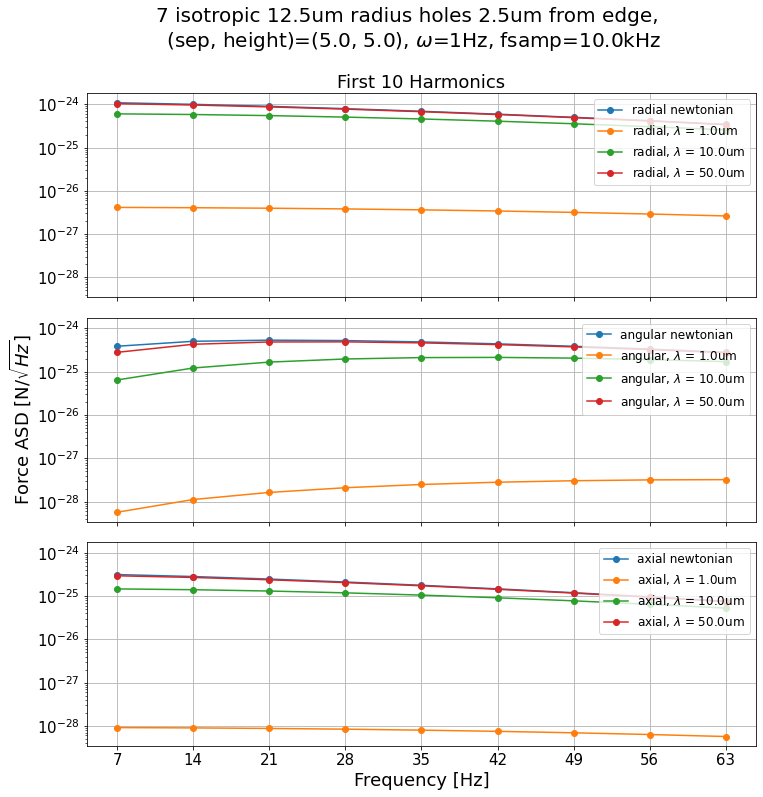

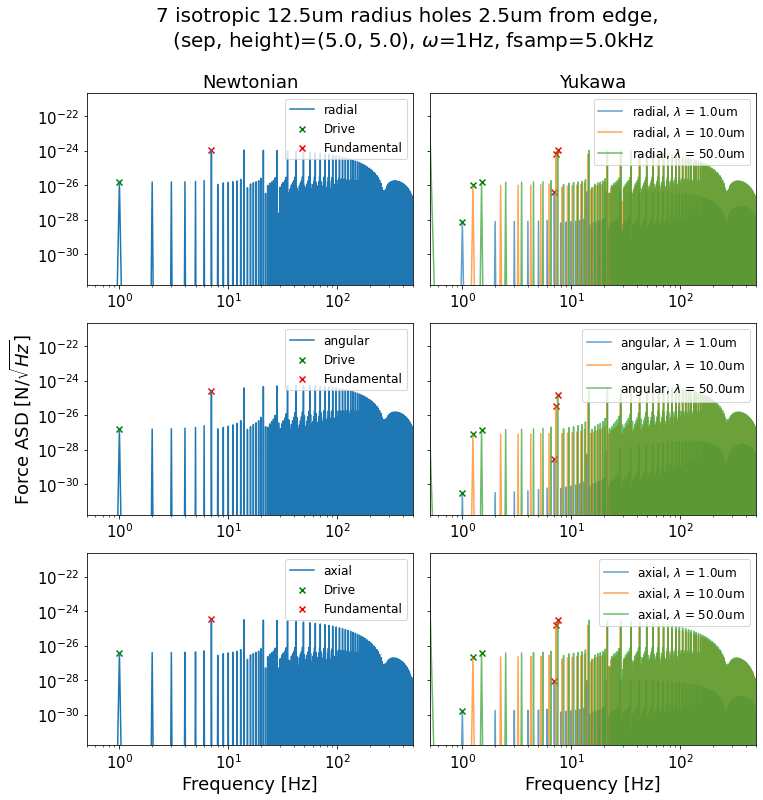

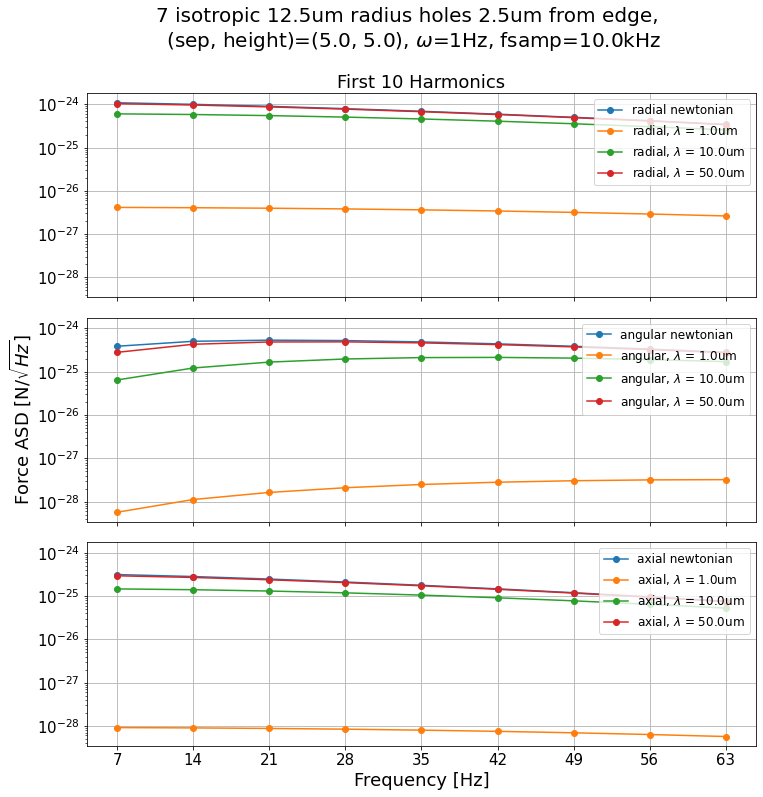

In [95]:
HA.plot_asd(w=1, tint=10, fsamp=5e3)
HA.plot_signals(w=1, tint=10, fsamp=10e3, num_harmonics=10)

### First Two Harmonics vs Hole Number
##### Driven at 1 Hz, sampled at 5 kHz

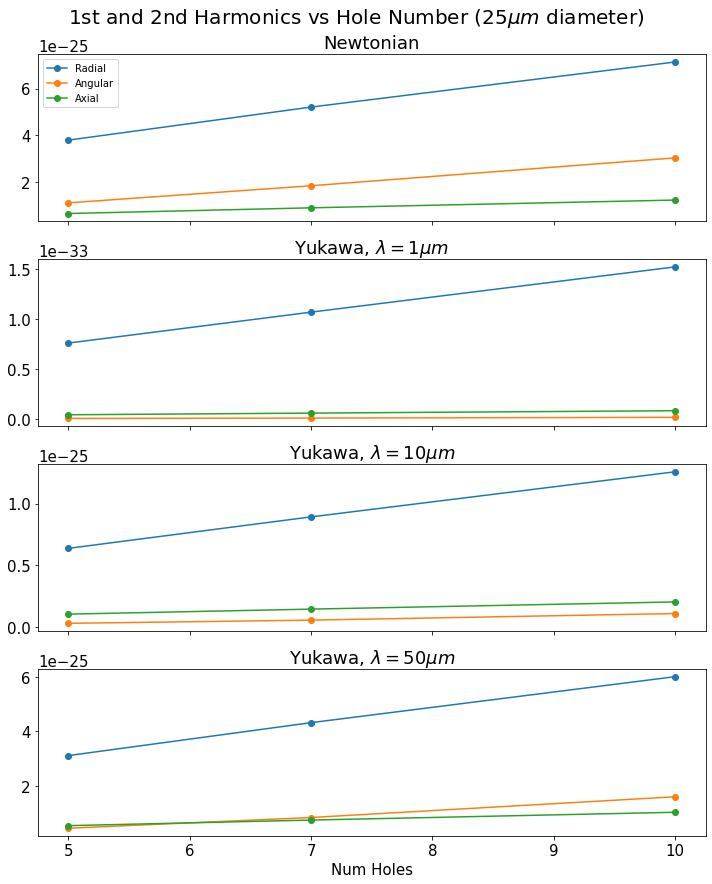

In [113]:
%matplotlib inline

hr = 12.5
from_edge = 2.5
Ns = sorted(PS.Ns)

full_harmonics = np.zeros((len(Ns), 4, 3))

for i,N in enumerate(Ns):
    trial_data = data[N][from_edge][hr][20.0][5.0]
    params = N,from_edge,hr,20.0,5.0
    analysis = holes_analysis(data, params)
    harmonics = analysis.sum_harmonics(w=1, tint=10, fsamp=5e3, num_harmonics=2)
    full_harmonics[i,:,:] = harmonics

fig, ax = plt.subplots(4, figsize=(10,12), sharex=True)

for i in range(4):
    ax[i].plot(Ns, full_harmonics[:,i,:], 'o-')
    
ax[0].set_title('Newtonian', fontsize=18)
ax[1].set_title(r'Yukawa, $\lambda=1 \mu m$', fontsize=18)
ax[2].set_title(r'Yukawa, $\lambda=10\mu m$', fontsize=18)
ax[3].set_title(r'Yukawa, $\lambda=50\mu m$', fontsize=18)

ax[0].legend(['Radial', 'Angular', 'Axial'])
ax[3].set_xlabel('Num Holes', fontsize=15)

fig.suptitle('1st and 2nd Harmonics vs Hole Number (25$\mu m$ diameter)', fontsize=20, x=0.5, y=1.02)
plt.tight_layout()

# plt.savefig('harmonics_vs_Ns.png', dpi=150)
    
plt.show()

A bit surprising that there's such a dramatic increase in frequency content, and that it's linear. Next try driving at all the same frequency, i.e. 10 holes at 1 Hz, 5 holes at 2 Hz, etc. and see if there's a difference (expect there to still be a difference but perhaps not as dramatic).

### First Two Harmonics vs Hole Radius
##### Driven at 1 Hz, sampled at 5 kHz

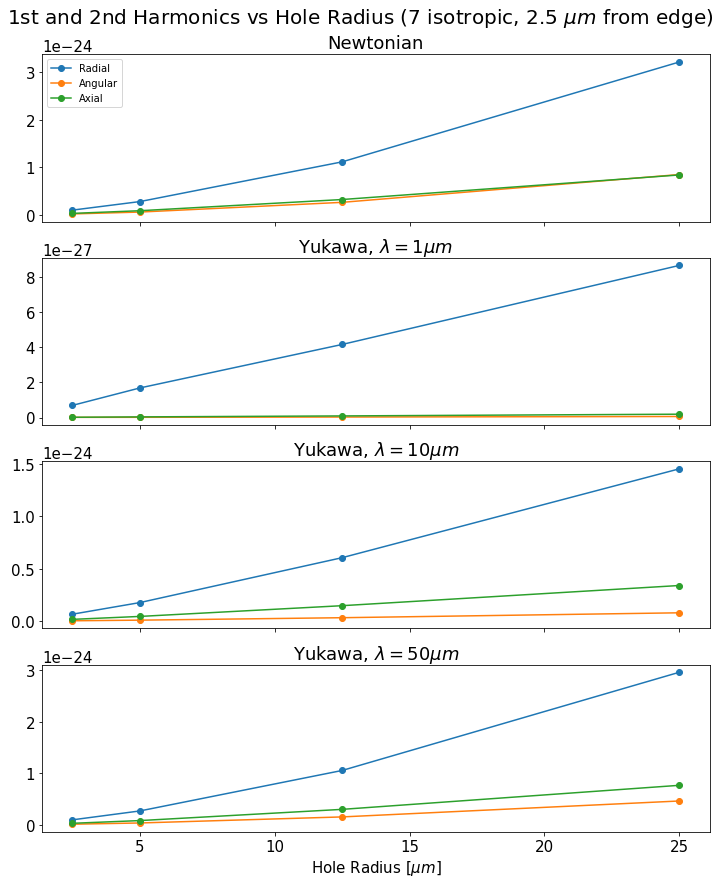

In [143]:
N = 7
from_edge = 2.5
hrs = sorted(PS.hrs)
sep, height = 5.0, 5.0

full_harmonics = np.zeros((len(hrs), 4, 3))

for i,hr in enumerate(hrs):
    trial_data = data[N][from_edge][hr][sep][height]
    params = N,from_edge,hr,sep,height
    analysis = holes_analysis(data, params)
    harmonics = analysis.sum_harmonics(w=1, tint=10, fsamp=5e3, num_harmonics=2)
    full_harmonics[i,:,:] = harmonics

fig, ax = plt.subplots(4, figsize=(10,12), sharex=True)

for i in range(4):
    ax[i].plot(hrs, full_harmonics[:,i,:], 'o-')
    
ax[0].set_title('Newtonian', fontsize=18)
ax[1].set_title(r'Yukawa, $\lambda=1 \mu m$', fontsize=18)
ax[2].set_title(r'Yukawa, $\lambda=10\mu m$', fontsize=18)
ax[3].set_title(r'Yukawa, $\lambda=50\mu m$', fontsize=18)

ax[0].legend(['Radial', 'Angular', 'Axial'])
ax[3].set_xlabel('Hole Radius [$\mu m$]', fontsize=15)

fig.suptitle('1st and 2nd Harmonics vs Hole Radius (7 isotropic, 2.5 $\mu m$ from edge)', fontsize=20, x=0.5, y=1.02)
plt.tight_layout()

# plt.savefig('harmonics_vs_hrs.png', dpi=150)
    
plt.show()

Not surprising that bigger holes lead to bigger harmonic components.

### First Two Harmonics vs Edge Distance AND Hole Radius
##### Driven at 1 Hz, sampled at 5 kHz

The size of the hole actually affects the relationship between edge distance and harmonic components, i.e. it's not monotonically decreasing as I expected, even for Newtonian (wouldn't have been surprised with Yukawa as it has characteristic scales). This is something to look into for non-isotropic patterns, i.e. varying hole radius and edge distance to target different lambdas.

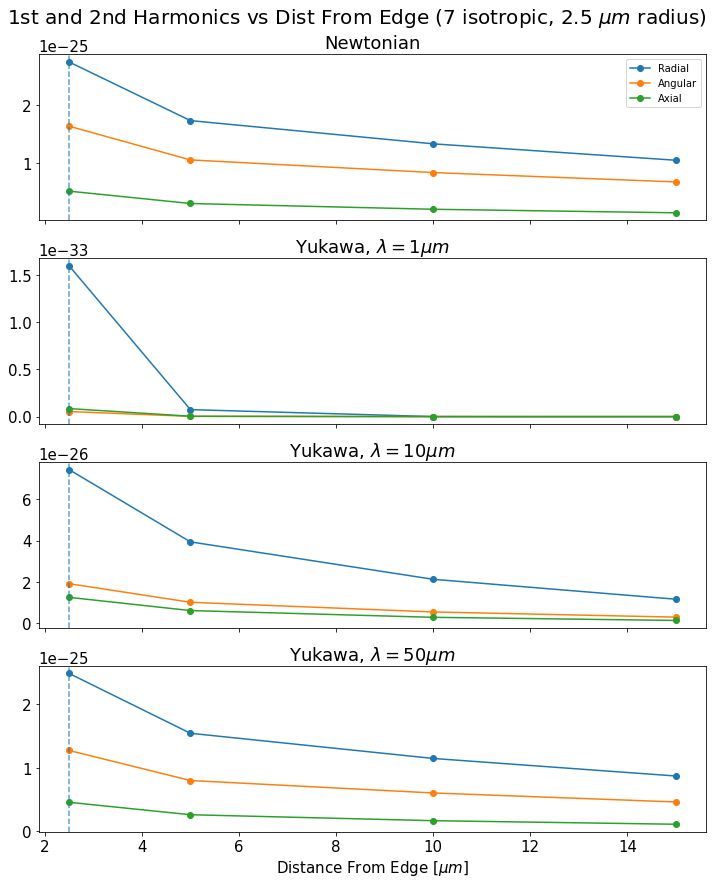

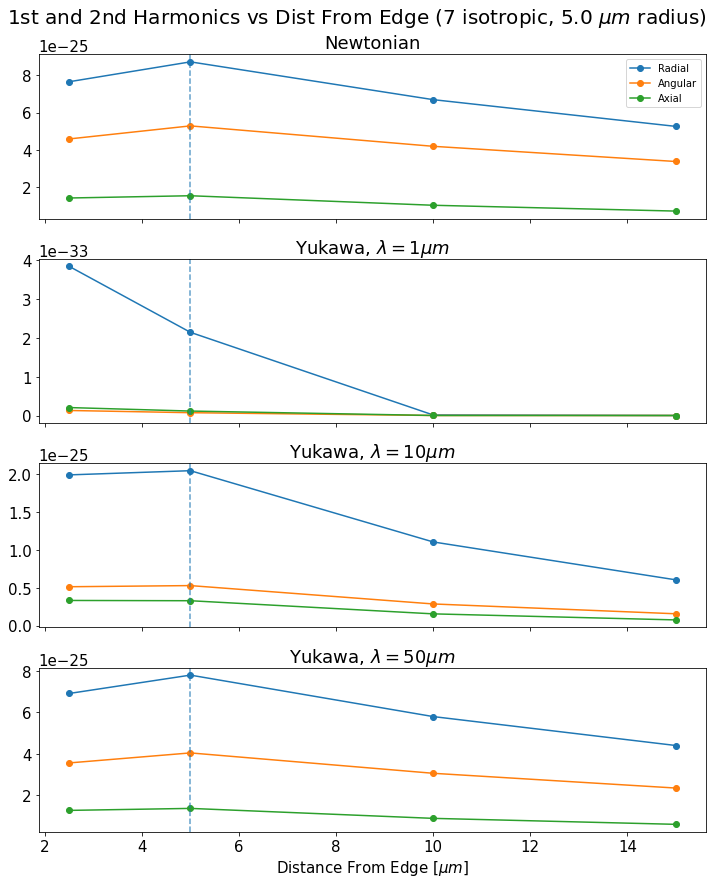

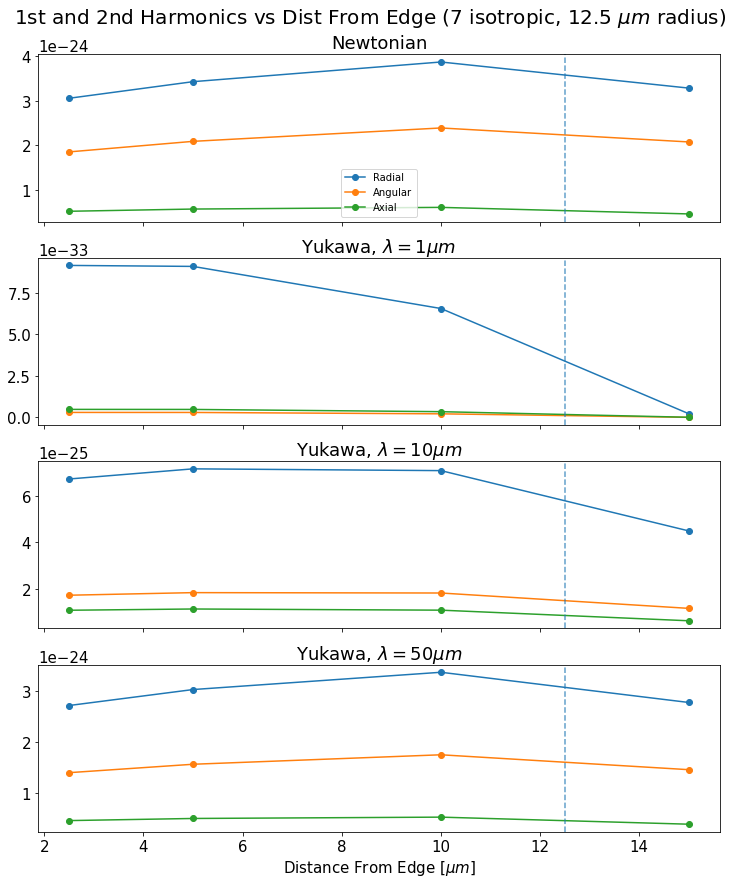

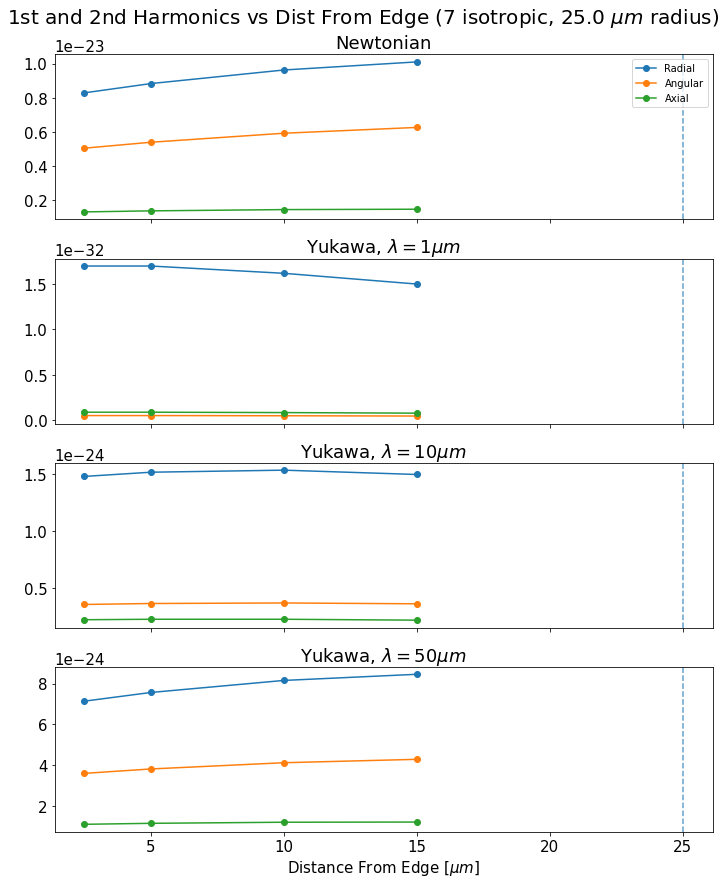

In [139]:
N = 7
from_edges = sorted(PS.from_edges)
sep, height = 20.0, 5.0

for hr in sorted(PS.hrs):

    full_harmonics = np.zeros((len(hrs), 4, 3))

    for i,from_edge in enumerate(from_edges):
        trial_data = data[N][from_edge][hr][sep][height]
        params = N,from_edge,hr,sep,height
        analysis = holes_analysis(data, params)
        harmonics = analysis.sum_harmonics(w=1, tint=10, fsamp=5e3, num_harmonics=10)
        full_harmonics[i,:,:] = harmonics

    fig, ax = plt.subplots(4, figsize=(10,12), sharex=True)

    for i in range(4):
        ax[i].plot(from_edges, full_harmonics[:,i,:], 'o-')
        ax[i].axvline(hr, ls='--', alpha=0.7)

    ax[0].set_title('Newtonian', fontsize=18)
    ax[1].set_title(r'Yukawa, $\lambda=1 \mu m$', fontsize=18)
    ax[2].set_title(r'Yukawa, $\lambda=10\mu m$', fontsize=18)
    ax[3].set_title(r'Yukawa, $\lambda=50\mu m$', fontsize=18)

    ax[0].legend(['Radial', 'Angular', 'Axial'])
    ax[3].set_xlabel('Distance From Edge [$\mu m$]', fontsize=15)

    fig.suptitle(f'1st and 2nd Harmonics vs Dist From Edge (7 isotropic, {hr} $\mu m$ radius)', fontsize=20, x=0.5, y=1.02)
    plt.tight_layout()

    # plt.savefig('harmonics_vs_edge.png', dpi=150)

    plt.show()

### NEXT: Check Yukawa hypothesis, anisotropic profiles, slots, partition asymptotes